In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sellers = pd.read_csv('sellers.csv', delimiter=',')
order_items = pd.read_csv('order_items.csv')
customers = pd.read_csv('customers.csv')

In [3]:
# Convert timestamps to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
# Convert missing values to mean
products['product_weight_g'].fillna(products['product_weight_g'].mean(), inplace=True)

# Merge dataframes
merged_df = pd.merge(order_items, products, on='product_id')
merged_df = pd.merge(merged_df, sellers, on='seller_id')
merged_df = pd.merge(merged_df, orders, on='order_id')
merged_df = pd.merge(merged_df, customers, on='customer_id')

In [4]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [5]:
# Calculate the total price (price for products + shipping cost a.k.a. freight value)
merged_df['total_price'] = merged_df['price'] + merged_df['freight_value']

# Calculate the turnover for each category
category_turnover = merged_df.groupby('product_category_name')['total_price'].sum().sort_values()

# Biggest/smalles turnover

In [8]:
# Calculate seller turnover
seller_turnover = merged_df.groupby('seller_id')['total_price'].sum().sort_values()

In [9]:
# Calculate top and bottom sellers
top_sellers = seller_turnover.nlargest(5)
bottom_sellers = seller_turnover.nsmallest(5)

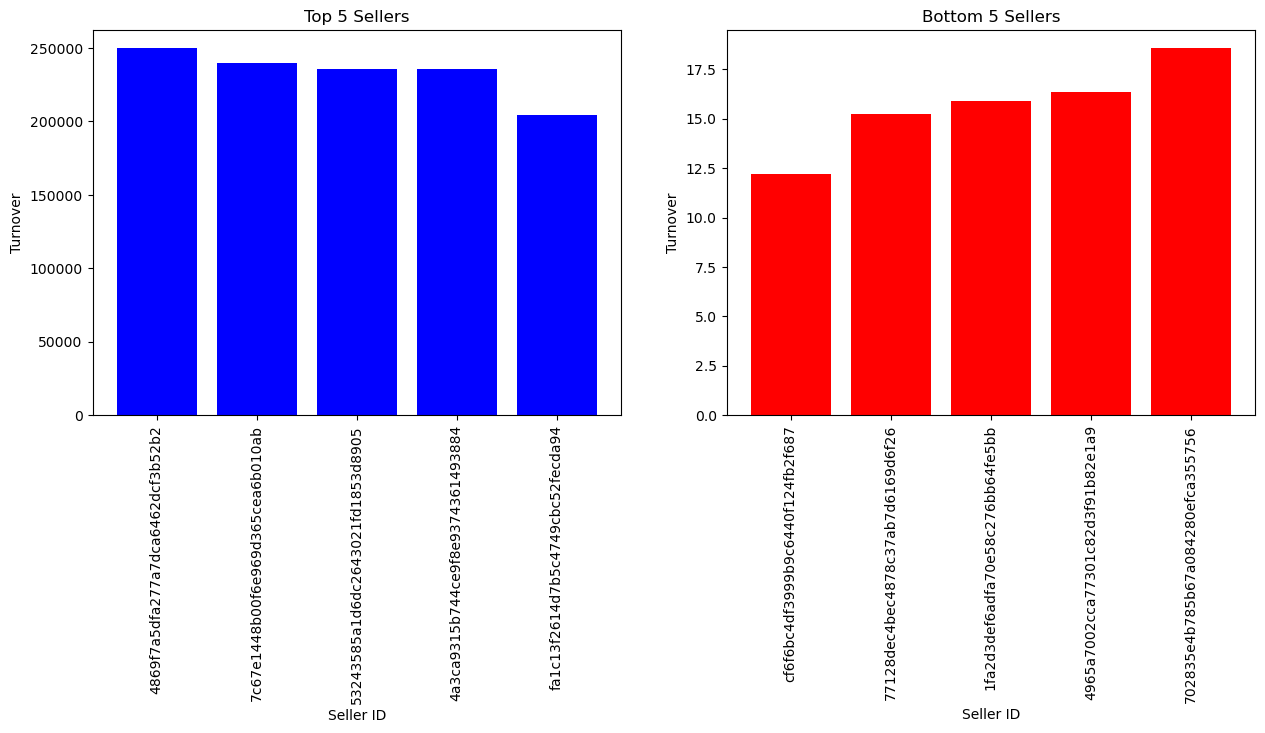

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting top sellers
axes[0].bar(top_sellers.index, top_sellers.values, color='blue')
axes[0].set_title('Top 5 Sellers')
axes[0].set_xlabel('Seller ID')
axes[0].set_ylabel('Turnover')
axes[0].tick_params(axis='x', rotation=90)

# Plotting bottom sellers
axes[1].bar(bottom_sellers.index, bottom_sellers.values, color='red')
axes[1].set_title('Bottom 5 Sellers')
axes[1].set_xlabel('Seller ID')
axes[1].set_ylabel('Turnover')
axes[1].tick_params(axis='x', rotation=90)

plt.show()

# Leaders/outsiders in sales in each area

In [15]:
# Calculate total sales by state
state_sales = merged_df.groupby('customer_state')['total_price'].sum().sort_values(ascending=False)

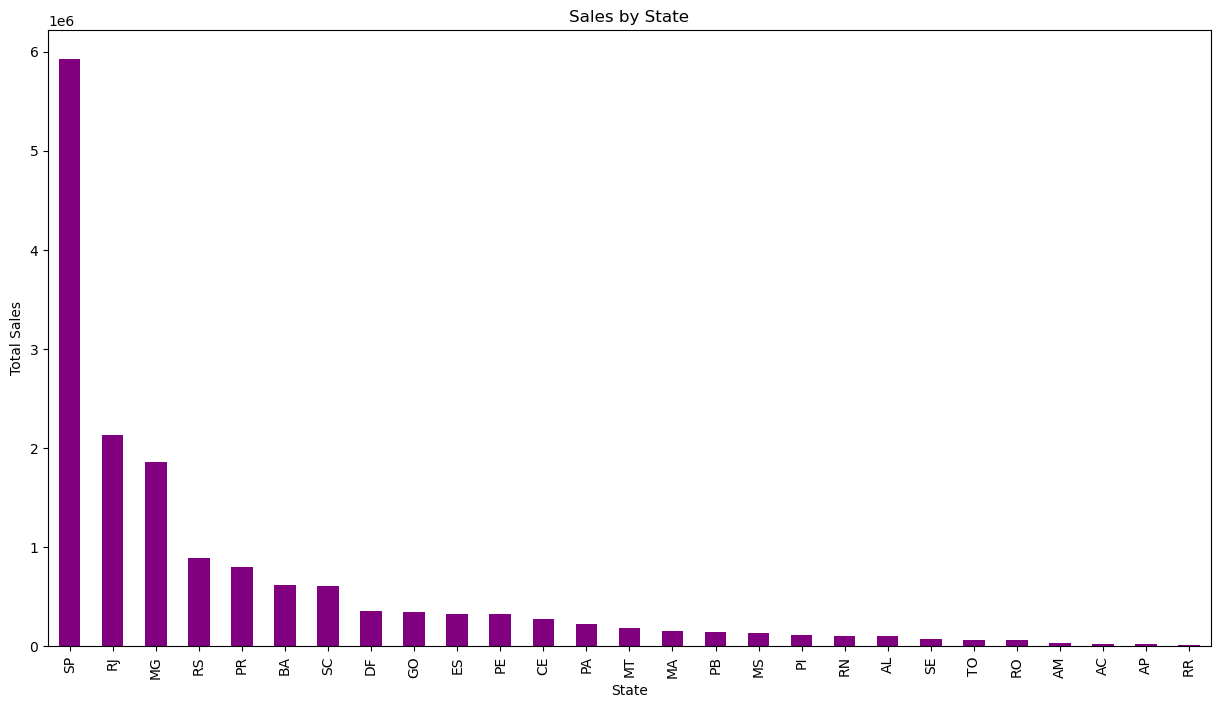

In [16]:
plt.figure(figsize=(15, 8))
state_sales.plot(kind='bar', color='purple')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

# Turnover by category

In [17]:
# Calculate turnover by product category
category_turnover = merged_df.groupby('product_category_name')['total_price'].sum().sort_values(ascending=False)

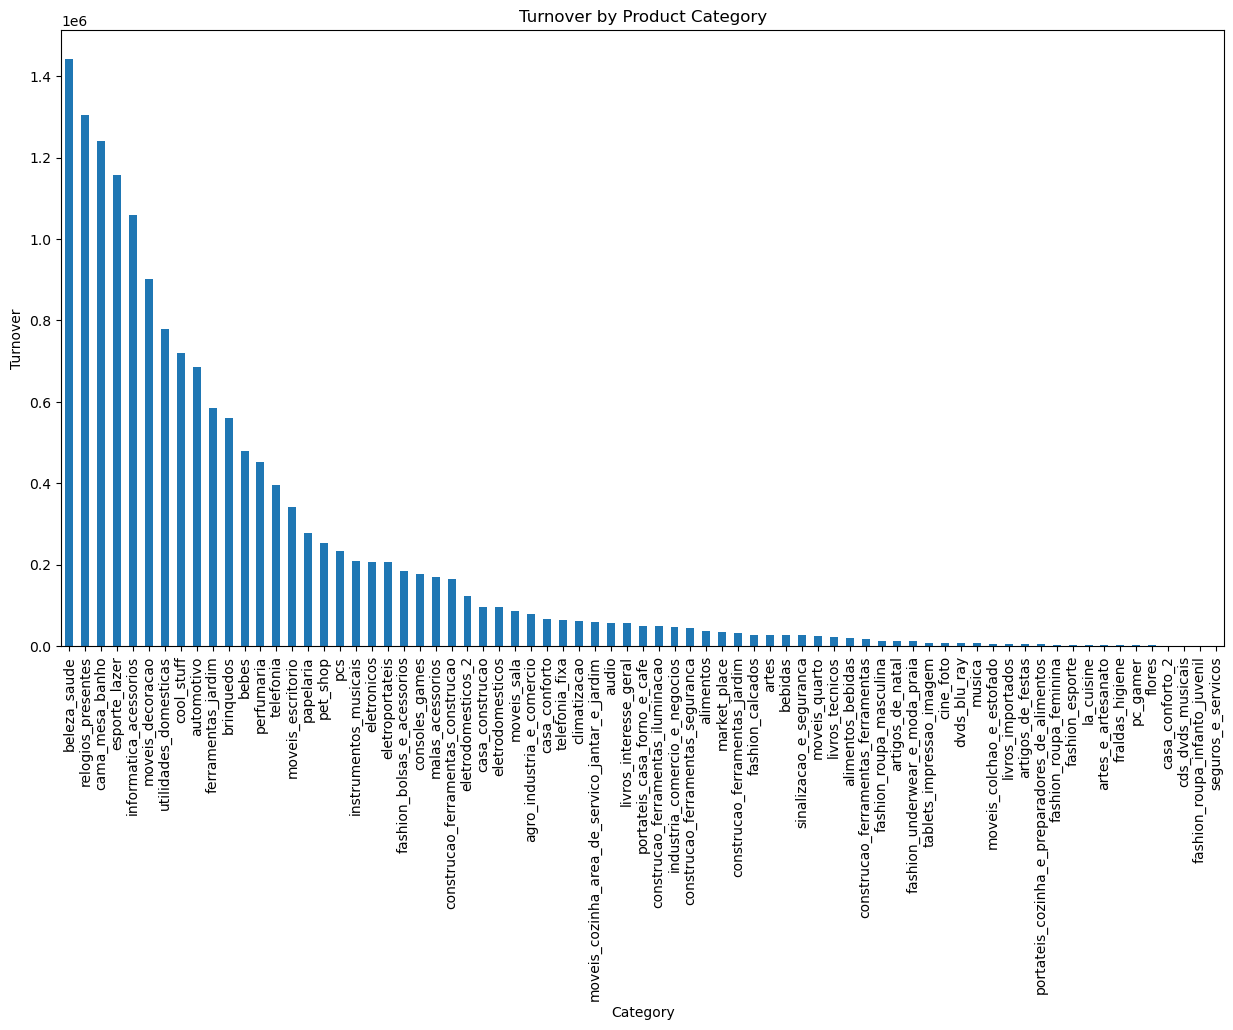

In [18]:
plt.figure(figsize=(15, 8))
category_turnover.plot(kind='bar')
plt.title('Turnover by Product Category')
plt.xlabel('Category')
plt.ylabel('Turnover')
plt.show()

# Dependence of product weight on turnover and price (relationship)

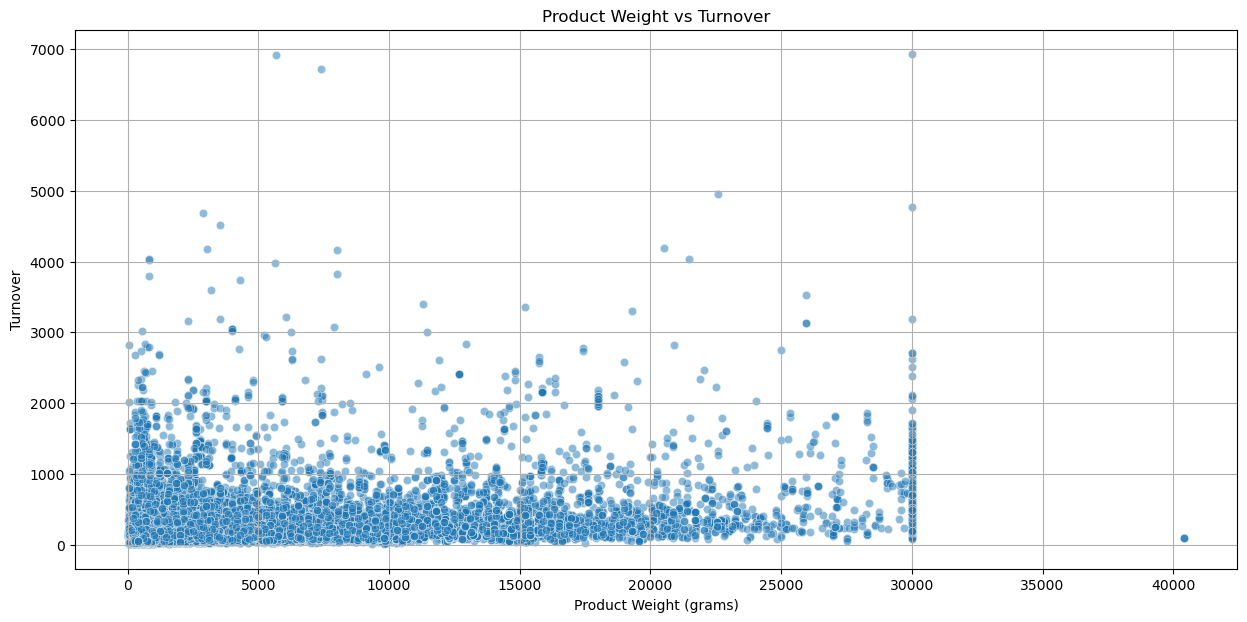

In [19]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='product_weight_g', y='total_price', data=merged_df, alpha=0.5)
plt.title('Product Weight vs Turnover')
plt.xlabel('Product Weight (grams)')
plt.ylabel('Turnover')
plt.grid(True)
plt.show()

# Conclusion

<b>Best/Worst sellers:</b> Turnover/weight correlation: Examining the connection between product weight and sales can guide 
shipping strategies and pricing models. Heavier products may be less lucrative because of increased shipping expenses, indicating a need for price adjustments or promotional tactics to enhance their sales. Additionally, insights from this analysis could help in optimizing packaging solutions or negotiating better shipping rates, further improving profitability for these items.

<b>Turnover by Product category:</b> Analyzing turnover by product category reveals best-sellers and underperformers, guiding inventory and marketing strategies. It helps optimize stock levels, tailor promotions, spot seasonal trends, and inform pricing and product development. These insights enhance profitability and customer satisfaction.
    
<b>Dependence of product weight on turnover and price:</b> Analyzing how product weight affects turnover and pricing provides critical insights. Heavier items often incur higher shipping costs, potentially reducing profitability and sales volume. Understanding this relationship helps in adjusting prices, optimizing shipping strategies, and developing targeted promotions to boost sales of heavier products. These insights can lead to better pricing models and improved overall profitability.

## NOTE:
According to principles of making good data visualisation, tick labels <b>SHOULD NEVER</b> be rotated 90 degrees like in all of the visualisations that you can see above. It's just that the labels are too long and it makes no point to rotate them horizontally.